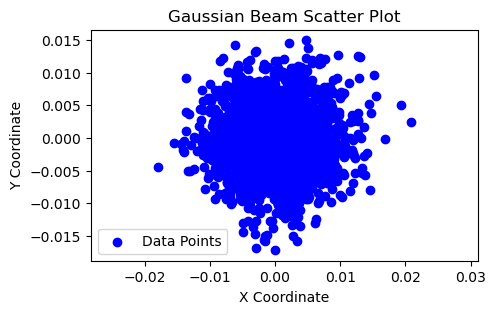

In [20]:
import matplotlib.pyplot as plt

def read_gaussian_beam_data(file_path):
    """
    Reads X and Y coordinates from a .dat file where:
    - The first line contains X coordinates prefixed by 'x coordinate:'
    - The second line contains Y coordinates prefixed by 'y coordinate:'

    Parameters:
    - file_path: str, path to the .dat file.

    Returns:
    - x_coords: list of floats, X coordinates.
    - y_coords: list of floats, Y coordinates.
    """
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()  # Read all lines from the file
            
            if len(lines) < 2:
                # Ensure there are at least two lines for X and Y
                raise ValueError("The data file must contain at least two lines for X and Y coordinates.")
            
            # Process X coordinates
            x_line = lines[0].strip()  # Remove leading/trailing whitespace
            if not x_line.lower().startswith('x coordinate:'):
                # Ensure the first line starts with 'x coordinate:'
                raise ValueError("The first line must start with 'X coordinate:'.")
            # Split the line at ':' and take the second part
            x_values_str = x_line.split(':', 1)[1].strip()
            # Split the string into individual values and convert to float
            x_coords = [float(value) for value in x_values_str.split()]
            
            # Process Y coordinates
            y_line = lines[1].strip()  # Remove leading/trailing whitespace
            if not y_line.lower().startswith('y coordinate:'):
                # Ensure the second line starts with 'y coordinate:'
                raise ValueError("The second line must start with 'Y coordinate:'.")
            # Split the line at ':' and take the second part
            y_values_str = y_line.split(':', 1)[1].strip()
            # Split the string into individual values and convert to float
            y_coords = [float(value) for value in y_values_str.split()]
            
            # Check if both lists have the same length
            if len(x_coords) != len(y_coords):
                raise ValueError("The number of X and Y coordinates must be the same.")
            
            return x_coords, y_coords

    except FileNotFoundError:
        # Handle case where the file does not exist
        print(f"Error: The file '{file_path}' was not found.")
        raise
    except ValueError as ve:
        # Handle incorrect formatting or unequal lengths
        print(f"Value Error: {ve}")
        raise
    except Exception as e:
        # Handle any other unexpected errors
        print(f"An unexpected error occurred: {e}")
        raise

def plot_coordinates(x, y, title='Scatter Plot of Gaussian Beam Coordinates', 
                    xlabel='X Coordinate', ylabel='Y Coordinate', 
                    color='blue', marker='o'):
    """
    Plots X and Y coordinates on a scatter plot.
    """
    plt.figure(figsize=(5, 3))  # Set the size of the plot
    plt.scatter(x, y, color=color, marker=marker, label='Data Points')  # Plot the data points
    
    # Add title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # plt.grid(True)       # Add grid lines
    plt.axis('equal')    # Ensure equal scaling on both axes
    plt.legend()         # Add a legend
    plt.show()  # Display the plot

def main():
    # Path to the data file
    data_file = 'gaussianBeamXY.dat'
    
    try:
        # Read the coordinates from the file
        x_coords, y_coords = read_gaussian_beam_data(data_file)
        
        # Plot the coordinates
        plot_coordinates(x_coords, y_coords, 
                        title='Gaussian Beam Scatter Plot', 
                        xlabel='X Coordinate', 
                        ylabel='Y Coordinate',
                        color='blue',  # Optional: Change marker color
                        marker='o')     # Optional: Change marker style
                        
                        
    except Exception as e:
        # Handle any errors that occurred during reading or plotting
        print("Failed to read and plot the Gaussian Beam data.")

if __name__ == "__main__":
    main()
